## NLP Project 2 - PART A
- DOMAIN: Digital content and entertainment industry
- CONTEXT: The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.
- DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [3]:
# Importing the imdb datasets with vocab size of 10000 and number of words as 20 from each review.
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 20  #number of word used from each review

In [4]:
# Load dataset as a list of ints
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test =  pad_sequences(X_test, maxlen=maxlen)

In [5]:
X_train.shape

(25000, 20)

In [6]:
X_test.shape

(25000, 20)

#### Function to perform relevant sequence adding on the data

In [7]:
def vectorize(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
 

In [8]:
#consolidating data for EDA
data = np.concatenate((X_train, X_test), axis=0)
label = np.concatenate((y_train, y_test), axis=0)

In [9]:
print("Categories:", np.unique(label))
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 9858


In [10]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 20.0
Standard Deviation: 0


#### Let's look at a single training example:

In [11]:
print("Label:", label[0])

Label: 1


In [12]:
print(data[0])

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]


#### Let's decode the first review

In [13]:
# Decoding the first review from the loaded datasets
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded) 

1654784/1641221 [==============================] - 0s 0us/step
story was so lovely because it was true and was someone's life after all that was shared with us all


In [14]:
#Adding sequence to data
data = vectorize(data)
label = np.array(label).astype("float32")

In [15]:
label

array([1., 0., 0., ..., 0., 0., 0.], dtype=float32)

#### Let's check distribution of data

In [16]:
#To plot for EDA
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='label', ylabel='count'>

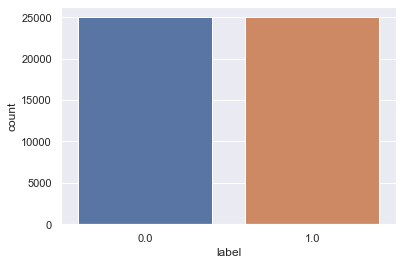

In [17]:
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

For above analysis it is clear that data has equel distribution of sentiments.This will help us building a good model.

#### Creating train and test data set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,label, test_size=0.30, random_state=1)

In [20]:
X_train.shape

(35000, 10000)

In [21]:
X_test.shape

(15000, 10000)

#### Let's create sequential model

In [23]:
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers

In [24]:
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

2022-07-18 22:45:33.497511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
#For early stopping 
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)


In [26]:
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)


In [27]:
results = model.fit(
 X_train, y_train,
 epochs= 100,
 batch_size = 40,
 validation_data = (X_test, y_test),
 callbacks=[callback]
)

Epoch 1/100
875/875 [==============================] - 4s 4ms/step - loss: 0.5233 - accuracy: 0.7305 - val_loss: 0.4707 - val_accuracy: 0.7670
Epoch 2/100
875/875 [==============================] - 3s 4ms/step - loss: 0.3952 - accuracy: 0.8212 - val_loss: 0.4780 - val_accuracy: 0.7655
Epoch 3/100
875/875 [==============================] - 3s 4ms/step - loss: 0.2981 - accuracy: 0.8745 - val_loss: 0.5413 - val_accuracy: 0.7617
Epoch 4/100
875/875 [==============================] - 3s 4ms/step - loss: 0.2092 - accuracy: 0.9165 - val_loss: 0.6333 - val_accuracy: 0.7545
Epoch 5/100
875/875 [==============================] - 3s 4ms/step - loss: 0.1504 - accuracy: 0.9421 - val_loss: 0.7130 - val_accuracy: 0.7501
Epoch 6/100
875/875 [==============================] - 3s 4ms/step - loss: 0.1143 - accuracy: 0.9575 - val_loss: 0.8466 - val_accuracy: 0.7473
Epoch 7/100
875/875 [==============================] - 3s 4ms/step - loss: 0.0919 - accuracy: 0.9650 - val_loss: 0.9156 - val_accuracy: 0.7463

In [31]:
#Accuracy
print(np.mean(results.history["val_accuracy"]))

0.7500527823964754


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


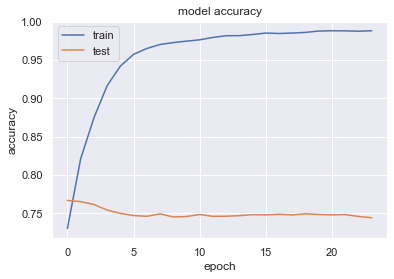

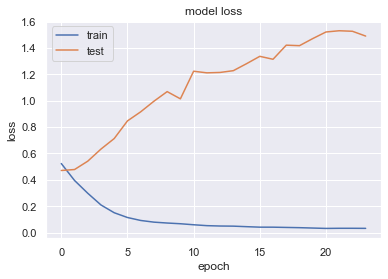

In [29]:
#Let's plot training history of our model

# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model.predict(X_test)

array([[0.07739377],
       [0.99895257],
       [0.99963546],
       ...,
       [0.10373473],
       [0.47763556],
       [0.0159072 ]], dtype=float32)

## NLP Project 2 - PART B
- DOMAIN: Social media analytics
- CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project,
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.
- DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This
reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as
compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the
real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection


## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data.
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [32]:
import pandas as pd
import os

data = pd.read_json(os.path.join('Sarcasm_Headlines_Dataset.json'),lines=True)

In [33]:
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [34]:
print (data.shape)
data.describe()

(28619, 3)


,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [35]:
data['headline'][1]

'dem rep. totally nails why congress is falling short on gender, racial equality'

In [36]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text

data['headline']=data['headline'].apply(cleanData)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harmanpreetsingh/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
data['headline'][1]

'dem rep totally nails why congress is falling short on gender racial equality'

## Drop `article_link` from dataset.
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [38]:
data.drop('article_link',inplace=True,axis=1)

## Get the Length of each line and find the maximum length.
As different lines are of different length. We need to pad the our sequences using the max length.

In [39]:
maxlen = max([len(text) for text in data['headline']])

#**## Modelling**

## Import required modules required for modelling.

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model.

In [41]:
max_features = 10000
maxlen = max([len(text) for text in data['headline']])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [42]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=' ', char_level=False)
tokenizer.fit_on_texts(data['headline'])

# Define X and y for your model.

In [43]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 28619
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size
You can use tokenizer.word_index.

In [44]:
num_words=len(tokenizer.word_index)
print (num_words)

28846


#**## Word Embedding**

## Get Glove Word Embeddings

In [45]:
glove_file = "glove.6B.zip"

In [46]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [47]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [48]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [49]:
### Embedding layer for hint 
import tensorflow as tf

input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(2,activation='softmax')(dense)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy


In [50]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 910)]             0         
                                                                 
 embedding (Embedding)       (None, 910, 200)          5769200   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dense_5 (Dense)             (None, 2)                 202       
                                                             

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/5
229/229 [==============================] - 1242s 5s/step - loss: 0.6245 - accuracy: 0.6647
Epoch 2/5
229/229 [==============================] - 1475s 6s/step - loss: 0.3859 - accuracy: 0.8333
Epoch 3/5
229/229 [==============================] - 1267s 6s/step - loss: 0.2498 - accuracy: 0.9011
Epoch 4/5
229/229 [==============================] - 1426s 6s/step - loss: 0.1768 - accuracy: 0.9358
Epoch 5/5
229/229 [==============================] - 1223s 5s/step - loss: 0.1307 - accuracy: 0.9537


In [52]:
test_pred = model.predict(np.array(X_test), verbose=1)

179/179 [==============================] - 133s 742ms/step


In [53]:
test_pred = [1 if j>i else 0 for i,j in test_pred]

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[2418,  559],
       [ 292, 2455]])

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      2977
           1       0.81      0.89      0.85      2747

    accuracy                           0.85      5724
   macro avg       0.85      0.85      0.85      5724
weighted avg       0.85      0.85      0.85      5724

